# Predicting the next iPhone review using previous reviews 

In [1]:
!pip install gensim==4.3.1

  Using cached gensim-4.3.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
  Using cached numpy-1.24.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pathy 0.6.2 requires smart-open<6.0.0,>=5.2.1, but you have smart-open 6.3.0 which is incompatible.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [21]:
!pip install wordcloud==1.8.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 KB 68.1 MB/s eta 0:00:00
  Using cached numpy-1.24.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 123.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 150.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 120.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 118.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 KB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 KB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 KB 16.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googl

In [1]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from sklearn import svm
import random
from gensim.models import Word2Vec
import gensim.downloader as api
import string
import re
from nltk.tokenize import word_tokenize
from sklearn.impute import SimpleImputer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# iPhone 11

In [15]:
df = pd.read_csv("/work/Apple-iPhone-7-32GB-Black.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_title   1420 non-null   object 
 1   average_rating  1420 non-null   float64
 2   total_reviews   1420 non-null   int64  
 3   review_author   1420 non-null   object 
 4   review_rating   1420 non-null   int64  
 5   review_text     1420 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 77.7+ KB


In [17]:
df

,product_title,average_rating,total_reviews,review_author,review_rating,review_text
0,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,Doreen Corliss,1,This phone has absolutely no battery life
1,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,thomas coleman,4,The phone has messed up I can’t dial or answer...
2,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,Lynda Pittman,5,Nothing
3,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,Kamilah,5,👍
4,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,Juan Carlos rivera nieto,1,Se descarga muy rápido. No sirve la batería
...,...,...,...,...,...,...
1415,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,Tyson Rehmer,1,Charges so slow. It actually went from 20 perc...
1416,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,Pia,1,I don’t like it
1417,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,Evelin,1,I received this iPhone and it doesn't even tur...
1418,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,yesenia morales,5,Bought this phone as a gift to my sister she s...


In [18]:
df.dropna(inplace=True)

In [54]:
stop_words = set(stopwords.words('english'))
selected_words = ['iphone', 'apple', 'brought', 'amazon', 'one', 'good', 'product', 'came', 'life', 'review', 'purchased', 'price', 'purchase', 'phone', 'month', 'buy', 'got', 'battery', 'work', 'seller']
stop_words.update(selected_words)

def process_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(tokens)
    return text


In [55]:
df['clean_text'] = df['review_text'].apply(process_text)

## Sentiment Analysis

In [57]:
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [58]:
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative')

In [59]:
df

,product_title,average_rating,total_reviews,review_author,review_rating,review_text,clean_text,sentiment,sentiment_category
0,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,Doreen Corliss,1,This phone has absolutely no battery life,absolutely,0.0000,negative
1,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,thomas coleman,4,The phone has messed up I can’t dial or answer...,messed cant dial answer still brand new havent...,-0.1496,negative
2,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,Lynda Pittman,5,Nothing,nothing,0.0000,negative
3,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,Kamilah,5,👍,,0.0000,negative
4,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,Juan Carlos rivera nieto,1,Se descarga muy rápido. No sirve la batería,se descarga muy rpido sirve la batera,0.0000,negative
...,...,...,...,...,...,...,...,...,...
1415,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,Tyson Rehmer,1,Charges so slow. It actually went from 20 perc...,charges slow actually went percent percent cha...,-0.2732,negative
1416,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,Pia,1,I don’t like it,dont like,-0.2755,negative
1417,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,Evelin,1,I received this iPhone and it doesn't even tur...,received doesnt even turn plugged charger left...,-0.6808,negative
1418,"Apple iPhone 7, 32GB, Black - Fully Unlocked (...",4.2,9848,yesenia morales,5,Bought this phone as a gift to my sister she s...,bought gift sister said everything fine loves,0.8126,positive


In [60]:
positive_threshold = 4.0
negative_threshold = 2.0
positive_text = df[df['review_rating'] >= positive_threshold]
negative_text = df[df['review_rating'] <= negative_threshold]

In [61]:
positive_text = df[df['sentiment_category'] == 'positive']
negative_text = df[df['sentiment_category'] == 'negative']

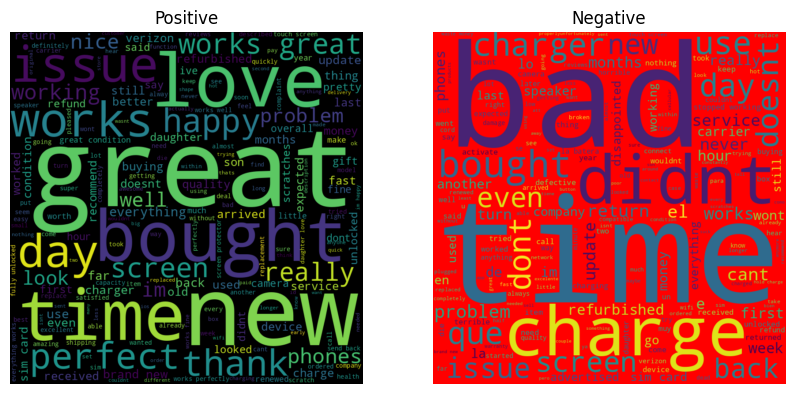

In [62]:
stop_words = set(STOPWORDS)

positive_cloud = WordCloud(stopwords=stop_words, width=800, height=800, background_color='black', min_font_size=10).generate(' '.join(positive_text['clean_text']))
negative_cloud = WordCloud(stopwords=stop_words, width=800, height=800, background_color='red', min_font_size=10).generate(' '.join(negative_text['clean_text']))
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(positive_cloud, interpolation='bilinear')
axes[0].set_title('Positive')
axes[0].axis('off')
axes[1].imshow(negative_cloud, interpolation='bilinear')
axes[1].set_title('Negative')
axes[1].axis('off')
plt.show()

### lowest sentiment text

In [30]:
lowest_sentiment_row = df.sort_values(by='sentiment').iloc[0]
print('Review text:', lowest_sentiment_row['review_text'])
print('Sentiment score:', lowest_sentiment_row['sentiment'])

Review text: Ordered iPhone 7. The phone arrived failing to hear callers or caller not hearing me. The phone volume control is grayed out and will not allow me to change. Volume do not work for headphones also. I found this was a know issue with iPhone 7 and 8 ...faulty Audio IC chip, bad seating to logicboard and bad solder joint. POOR Seller quality. Phone should not have been sent. Simple test, by seller, on the phone call function would have identified the issue and should have not been send. Dissatisfied! Merchant failed to offer a valid option for exchange. They suggested I purchase another phone and return the broken phone for refund. I recommend you DO NOT PURCHASE FROM THIS MERCHANT! Bad/Broken product, do not stand behind their renewed products, poor support.
Sentiment score: -0.967


### highest sentiment text

In [31]:
highest_sentiment_row = df.sort_values('sentiment', ascending=False).iloc[0]
print('Review text:', highest_sentiment_row['review_text'])
print('Sentiment score:', highest_sentiment_row['sentiment'])


Review text: What more can I say other than impressed! I purchased this iPhone for my son because his previous iPhone got the infamous screen glitch and I was not about to shell out $800 on a new phone. I was first nervous about buying used phone but the Amazon renew warranty made me feel a bit comfortable. Anyway I received the phone and it looked great! It looked new. It works just fine and I’m happy. On top of that I was given a free upgrade to the 128gb phone. I definitely appreciated that. After 2 months I am still impressed and amazed. I highly recommend!
Sentiment score: 0.9862


In [32]:
def clean_text(review_text):
    if isinstance(review_text, str):
        text = review_text.lower() # Convert to lowercase
        tokens = word_tokenize(text) # Tokenize the text
        tokens = [word for word in tokens if word.isalpha()] # Remove punctuation
        tokens = [word for word in tokens if word not in stop_words] # Remove stop words
        return tokens
    else:
        return ""

In [33]:
data =  positive_text + negative_text
labels = ['Positive'] * len(positive_text) + ['Negative']

In [34]:
data = [clean_text(text) for text in data['review_text']]

vectorizer = TfidfVectorizer()
text_data = vectorizer.fit_transform(df['clean_text'].values.astype('U')) # Convert to Unicode string

labels = df['review_text'].values

In [35]:

train_data, test_data, train_labels, test_labels = train_test_split(text_data, labels, test_size=0.4, random_state=42)

imputer = SimpleImputer(strategy='mean')
train_data = imputer.fit_transform(train_data)


## Logistic Regression

In [36]:
model = LogisticRegression()
model.fit(train_data, train_labels)

test_predictions = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.008802816901408451


## Naive Bayes 

In [37]:
model = MultinomialNB()
model.fit(train_data, train_labels)

test_predictions = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.008802816901408451


## Random Forest 

In [38]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_data, train_labels)

y_pred = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.008802816901408451


# oversampled

In [39]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
ros = RandomOverSampler(random_state=42)
train_data, train_labels = ros.fit_resample(train_data, train_labels)

# LogisticRegression

In [40]:
model = LogisticRegression()
model.fit(train_data, train_labels)

test_predictions = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.008802816901408451


# NaiveBayes

In [41]:
model = MultinomialNB()
model.fit(train_data, train_labels)

test_predictions = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.0035211267605633804


# RandomForest

In [42]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_data, train_labels)

y_pred = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.0035211267605633804


In [43]:
selected_word = input('Enter a word to search for: ')
selected_reviews = df[df['clean_text'].str.contains(selected_word)]

sid = SentimentIntensityAnalyzer()
selected_reviews['sentiment_score'] = selected_reviews['review_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
positive_reviews = selected_reviews[selected_reviews['sentiment_score'] > 0]
negative_reviews = selected_reviews[selected_reviews['sentiment_score'] <= 0]

# Print out the selected reviews by sentiment category
print(f"Positive reviews containing the word '{selected_word}':")
for review_text in positive_reviews['review_text']:
    print(review_text)

print(f"\nNegative reviews containing the word '{selected_word}':")
for review_text in negative_reviews['review_text']:
    print(review_text)

Positive reviews containing the word 'camera':
Phone works fine. I'm not a big user and don't use many functions. Mostly for phone and camera.
Overall good product! The cameras kind of glitches at times but it overall works. The battery dies very quickly, but it works perfectly fine even without a sim card. Very good product!
The camera works great.
Good camera quality and storage great for my lil sister
Awesome Phone. This is my first Apple product. It has great battery life. The camera takes great pictures. I love the size of the phone. It is small and light weight. It fits right into my pocket. The phone has lots of storage and memory. I love it.
Battery life is good, touch screen is good, camera quality is good, seller is also good, comes with generic charger is still good, generic box which is also good considering the price. No big dent or broken body which is good. The only bad thing is COVID-19 pandemic. #whenwillcovid19end?
Camera quality is nice
Great camera and phone
Size is

In [44]:
positive_selected_reviews = selected_reviews[(selected_reviews['sentiment_score'] > 0)]
num_positive_selected = len(positive_selected_reviews[positive_selected_reviews['clean_text'].str.contains(selected_word)])
num_total_selected = len(selected_reviews[selected_reviews['clean_text'].str.contains(selected_word)])
positive_percentage = num_positive_selected / num_total_selected * 100                           

# Print out the percentage of positive reviews containing the selected word
print(f"Percentage of positive reviews containing the word '{selected_word}': {positive_percentage:.2f}%")

Percentage of positive reviews containing the word 'camera': 70.45%


In [45]:
negative_selected_reviews = selected_reviews[(selected_reviews['sentiment_score'] <= 0)]
num_negative_selected = len(negative_selected_reviews[negative_selected_reviews['clean_text'].str.contains(selected_word)])
num_total_selected = len(selected_reviews[selected_reviews['clean_text'].str.contains(selected_word)])
negative_percentage = num_negative_selected / num_total_selected * 100                           

# Print out the percentage of negative reviews containing the selected word
print(f"Percentage of negative reviews containing the word '{selected_word}': {negative_percentage:.2f}%")

Percentage of negative reviews containing the word 'camera': 29.55%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=320e99cb-8487-44b0-a3ee-3aa3add03759' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>